# LENDING CLUB CASE STUDY
## Goal -
- If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

### Helper function

In [2]:
def column_meaning(column_name):
    '''Returns meainng of the column from data deoctionary provided
    '''
    meta_data = pd.read_excel('../data/Data_Dictionary.xlsx')
    meta_data.columns = ['column_name', 'description']
    return meta_data[meta_data['column_name']==column_name]['description'].values[0]

In [3]:
def univariate(df,column_name,title):
    value_count = df[column_name].value_counts()
    tempdf = pd.DataFrame({'category': value_count.index,'count':value_count})
    fig = px.bar(tempdf,x ='category',y = 'count',color='category',title =title)
    fig.show()

In [4]:
def insights(column_name,df):
    typ = df[column_name].dtype
    null_val = df[column_name].value_counts
    print("type: ",typ)
    print("null value count: ",null_val)

In [5]:
def upper_lower_fence(df,col):
    sns.boxplot(data=df, x=col)
    plt.show()
    describe = df[col].describe()
    Q1 = describe['25%']
    Q3 = describe['75%']
    min_value = describe['min']
    max_value = describe['max']
    IQR = Q3-Q1
    Upper_fence = min(Q3 + (1.5 * IQR), max_value) 
    Lower_fence = max(Q1 - (1.5 * IQR), min_value)
    print(F'{col} -> (Lower Fence = {Lower_fence}, Upper Fence = {Upper_fence})')
    return Upper_fence,Lower_fence

In [6]:
def log_normal_univariate(numeric_df,col,title):

    fig = make_subplots(rows=1,
                        cols=2,vertical_spacing=1.0,
                        subplot_titles=('normal scale',  'log scale'))

    fig.add_trace(
       go.Bar(y=numeric_df[col].value_counts(), x=numeric_df[col].value_counts().index,name = "normal scale"
                ),1,1
    )

    fig.add_trace(
       go.Bar(y=numeric_df[col].value_counts().apply(lambda x:math.log(x,10)), x=numeric_df[col].value_counts().index,name= "log scale"
                ),1,2
    )

    fig.update_layout(height=500, width=800, title_text=title)
    for i in range(1,3): 
        fig['layout']['xaxis{}'.format(i)]['title']=col
        fig['layout']['yaxis{}'.format(i)]['title']='frequency'
    fig.show()


In [7]:
def continuous_variable_graphs(df,col,title):
    binn = F'{col}_range'
    
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(title)

    plt.subplot(3, 3, 1)
    ax = sns.boxplot(x=df[col])
    ax.set_title("box plot for outlier detection")

    plt.subplot(3, 3, 2)
    ax = sns.kdeplot(df[col], shade = True)
    ax.set_title("distribution plot to see skewness of data")

    plt.subplot(3, 3, 3)
    ax = sns.histplot(df, x = col, bins = 5)
    ax.set_title("general distribution of data")
    
    if(binn in data_clean.columns.values):
        plt.subplot(3, 3, 5)
        ax = sns.countplot(data=data_clean, y=binn, hue='loan_status')
        ax.set_title('Range category vs Loan Status')

    plt.show()
    print("skew: ",df[col].skew())

In [8]:
def get_column_type(col_name):
    return data[col_name].dtype

In [9]:
def get_sample_value(col_name):
    col = column_analysis[column_analysis.column_name == col_name]
    dtype = col['dtype'].values[0]
    col_value = data[-data[col_name].isna()][col_name].values
    if (dtype == int or dtype == float) and col['missing_value_percent'].values[0] < 100:
        return F'{min(col_value)} | {max(col_value)}'
    elif dtype == object:
        _values = pd.Series(list(map(str,col_value))).unique()
        if(len(_values)/len(data) <= .15):
            return ' | '.join(_values)
        return ' | '.join(_values[:10])
    else:
        return None   

In [10]:
def date_handle(x):
    yr = int(x.split('-')[1])
    if yr>=0 and yr<22:
        return 2000+yr
    else:
        return 1900+yr

### Read data
- Read the load data file
- Read the column decription file

In [11]:
data = pd.read_csv('../data/loan.csv', low_memory=False)
meta_data = pd.read_excel('../data/Data_Dictionary.xlsx')
meta_data.columns = ['column_name', 'description']

In [12]:
data.info(
    max_cols = 111,
    show_counts = True
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### View of loan data
Top 5 rows of load data 

In [13]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

# Data Cleaning

<br></br>
**Current in loan status is not usefull for analysis so we can use only charged off and fully paid**

In [14]:
data_clean = data[data.loan_status != 'Current']

<br></br>
**Validation on loan amount ie loan amount should not be greater than funded and apporved amount**

In [15]:
data_clean[data_clean['loan_amnt']<data_clean['funded_amnt']]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

In [16]:
data_clean[data_clean['loan_amnt']<data_clean['funded_amnt_inv']]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

**loan issue date should not be greater than last installemt payment date**

In [17]:
data_clean[data_clean['issue_d']>data_clean['last_pymnt_d']].shape[0]

16632

#### Check if remaing principle amount is zero for fully paid loans
<b>out_prncp_inv</b> : Remaining outstanding principal for portion of total amount funded by investors


In [18]:
data_clean[data_clean['loan_status']=='Fully Paid']['out_prncp_inv'].sum()

0.0

#### Check if no recoveries made for fully paid account
- <b>recoveries</b>: After a loan has been marked as Default,how much amount was recoveried,for example by selling assets or other ways


In [19]:
data_clean[data_clean['loan_status']=='Fully Paid']['recoveries'].sum()

0.0

#### validating number of open account are not greater than total account

- <b>open_acc</b>: The number of open credit lines in the borrower's credit file.
- <b>total_acc</b>: The total number of credit lines currently in the borrower's credit file
- ideally open accounts should be less than the total accounts

In [20]:
data_clean[data_clean['open_acc']>data_clean['total_acc']]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39642  127213      85483       2000         2000           1575.0   36 months   

      int_rate  installment grade sub_grade        emp_title emp_length  \
39642    7.12%        61.87     A        A1  U.S. Government  10+ years   

      home_ownership  annual_inc verification_status issue_d loan_status  \
39642       MORTGAGE    118000.0        Not Verified  Sep-07  Fully Paid   

      pymnt_plan  \
39642          n   

                                                                   url  \
39642  https://lendingclub.com/browse/loanDetail.action?loan_id=127213   

                   desc             purpose             title zip_code  \
39642  consolidate debt  debt_consolidation  consolidate debt    020xx   

      addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
39642         MA  0.43            0           Jun-91               0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
39642                     NaN                     NaN        14        0   

       revol_bal revol_util  total_acc initial_list_status  out_prncp  \
39642       4709     18.50%          8                   f        0.0   

       out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
39642            0.0  2219.432551           1747.8           2000.0   

       total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
39642         219.43                 0.0         0.0                      0.0   

      last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
39642       Apr-10             3.06          NaN             Apr-10   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
39642                         NaN                          NaN            1   

      application_type  annual_inc_joint  dti_joint  \
39642       INDIVIDUAL               NaN        NaN   

       verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
39642                        NaN               0           NaN          NaN   

       open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  \
39642          NaN         NaN          NaN          NaN                 NaN   

       total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
39642           NaN      NaN          NaN          NaN         NaN       NaN   

       total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  \
39642               NaN     NaN          NaN           NaN   

       acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  \
39642                   NaN          NaN             NaN      NaN   

       chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  \
39642                       NaN            0                 NaN   

       mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
39642                   NaN                    NaN             NaN       NaN   

       mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
39642                   NaN                       NaN                    NaN   

       mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
39642                             NaN                    NaN             NaN   

       num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
39642              NaN          NaN        NaN        NaN            NaN   

       num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  \
39642            NaN                  NaN       NaN               NaN   

       num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
39642           NaN                 NaN                 NaN             NaN   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
39642               NaN                   NaN        NaN              NaN   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit

In [21]:
data_clean = data_clean[~(data_clean['open_acc']>data_clean['total_acc'])]

<br></br>
- **Investigating columns related to loan amount**

| column name | description |
| --- | --- |
| loan_amnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| funded_amnt | The total amount committed to that loan at that point in time. |
| funded_amnt_inv | The total amount committed by investors for that loan at that point in time. |
| revol_bal | Total credit revolving balance |
| out_prncp | Remaining outstanding principal for total amount funded |
| out_prncp_inv | Remaining outstanding principal for portion of total amount funded by investors |
| total_pymnt | Payments received to date for total amount funded |
| total_pymnt_inv | Payments received to date for portion of total amount funded by investors |
| total_rec_prncp | Principal received to date |
| total_rec_int | Interest received to date |
| last_pymnt_amnt | Last total payment amount received |

In [22]:
## investigating some numerical columns related to loan amount
loan_amnt_related_columns = [
    'loan_amnt',
    'funded_amnt',
    'funded_amnt_inv',
    'revol_bal',              
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'last_pymnt_amnt'
]
cor = data_clean[loan_amnt_related_columns]

In [23]:
cor.corr()

loan_amnt  funded_amnt  funded_amnt_inv  revol_bal  \
loan_amnt         1.000000     0.981789         0.937920   0.314012   
funded_amnt       0.981789     1.000000         0.956170   0.306491   
funded_amnt_inv   0.937920     0.956170         1.000000   0.286254   
revol_bal         0.314012     0.306491         0.286254   1.000000   
total_pymnt       0.881906     0.898706         0.874726   0.289284   
total_pymnt_inv   0.847630     0.864497         0.909124   0.273022   
total_rec_prncp   0.845865     0.864078         0.838582   0.276751   
total_rec_int     0.728338     0.736649         0.726731   0.241971   
last_pymnt_amnt   0.474606     0.478440         0.469158   0.125308   

                 total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
loan_amnt           0.881906         0.847630         0.845865       0.728338   
funded_amnt         0.898706         0.864497         0.864078       0.736649   
funded_amnt_inv     0.874726         0.909124         0.838582       0.726731   
revol_bal           0.289284         0.273022         0.276751       0.241971   
total_pymnt         1.000000         0.968579         0.973541       0.822431   
total_pymnt_inv     0.968579         1.000000         0.940297       0.805933   
total_rec_prncp     0.973541         0.940297         1.000000       0.683515   
total_rec_int       0.822431         0.805933         0.683515       1.000000   
last_pymnt_amnt     0.511528         0.500060         0.567457       0.242717   

                 last_pymnt_amnt  
loan_amnt               0.474606  
funded_amnt             0.478440  
funded_amnt_inv         0.469158  
revol_bal               0.125308  
total_pymnt             0.511528  
total_pymnt_inv         0.500060  
total_rec_prncp         0.567457  
total_rec_int           0.242717  
last_pymnt_amnt         1.000000

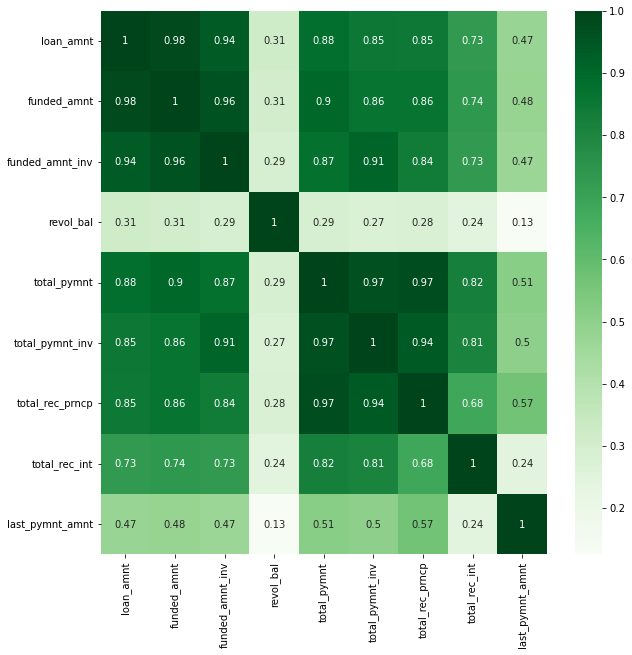

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(cor.corr(),cmap = 'Greens',annot = True)
plt.show()

`Below 6 columns seem highly corelated to loan amount and also are post loan approval features hence we should drop them`
- funded amount
- funded_amnt_inv
- total_pymnt
- total_pymnt_inv
- total_rec_int
- total_rec_prncp

In [25]:
corelated_to_loan_amnt = [
    'funded_amnt',
    'funded_amnt_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int'
]

data_clean.drop(corelated_to_loan_amnt,axis = 1,inplace = True)

In [26]:
left = list(set(loan_amnt_related_columns)-set(corelated_to_loan_amnt))

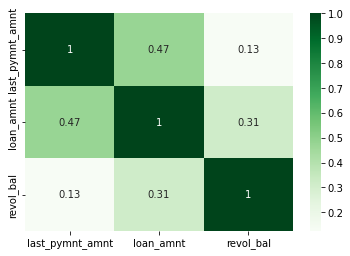

In [27]:
sns.heatmap(data_clean[left].corr(),cmap = 'Greens',annot = True)
plt.show()

<b>`Some other post loan approval features which should be dropped`</b>
 
- <b>last_pymnt_amnt</b>: Last total payment amount received
- <b>out_prncp</b>: Remaining outstanding principal for total amount funded
- <b>out_prncp_inv</b>: Remaining outstanding principal for portion of total amount funded by investors
- <b>total_rec_late_fee</b>: Late fees received to date
- <b>recoveries</b>: After a loan has been marked as Default,how much amount was recoveried,for example by selling assets or other ways
- <b>collection_recovery_fee</b>: money spend by LC for recovery collection
- <b>delinq_2yrs</b>: this column means that how many time the user payed the due amount after 30 days in past 2 yrs

In [28]:
data_clean.drop(
    [
        'collection_recovery_fee',
        'recoveries',
        'delinq_2yrs',
        'total_rec_late_fee',
        'last_pymnt_amnt',
        'out_prncp',
        'out_prncp_inv',
        'last_pymnt_d',
        'last_credit_pull_d',
    ],
    inplace = True,
    axis = 1
)

### Column analysis

Create new data frame for colum analysis where computed following data for each column
- Total number of missing values
- Total % of missing value
- Merged with description data
- Data type of column
- A shample column which store
    - If column is of int or float type then min and max value
    - If column is of object type the few shample values
- New categorical column for missing value categories depends on % of missing values
    - If 0 then VL (very low)
    - If b/w 1 - 10 then L(low)
    - If b/w 11 - 30 then M(medium)
    - If b/w 31 - 80 then H(high)
    - If b/w 81 - 100 then VH(very high)

In [29]:
column_analysis = pd.DataFrame(
    {'missing_value_percent':data_clean.apply(lambda x:round((x.isna().sum()/x.shape[0])*100,2)),
     'total_of_nan':data_clean.isna().sum(),
    'column_name':data_clean.columns}
)

In [30]:
column_analysis.head()

missing_value_percent  total_of_nan column_name
id                           0.0             0          id
member_id                    0.0             0   member_id
loan_amnt                    0.0             0   loan_amnt
term                         0.0             0        term
int_rate                     0.0             0    int_rate

In [31]:
column_analysis.reset_index(inplace = True,drop = True)

In [32]:
column_analysis.head()

missing_value_percent  total_of_nan column_name
0                    0.0             0          id
1                    0.0             0   member_id
2                    0.0             0   loan_amnt
3                    0.0             0        term
4                    0.0             0    int_rate

In [33]:
column_analysis['missing_category'] = pd.cut(
    x = column_analysis['missing_value_percent'], 
    bins= [-1.0, 0.0, 10.0, 30.0,80.0, 100.0],
    labels = [
        'Very Low (0% missing)','Low (1-10% missing)',
        'Medium (11-30% missing)', 
        'High (31-80% missing)',
        'Very High (80-100% missing)'
    ]
)

In [34]:
column_analysis['dtype'] = column_analysis.column_name.apply(get_column_type)

In [35]:
column_analysis.head()

missing_value_percent  total_of_nan column_name       missing_category  \
0                    0.0             0          id  Very Low (0% missing)   
1                    0.0             0   member_id  Very Low (0% missing)   
2                    0.0             0   loan_amnt  Very Low (0% missing)   
3                    0.0             0        term  Very Low (0% missing)   
4                    0.0             0    int_rate  Very Low (0% missing)   

    dtype  
0   int64  
1   int64  
2   int64  
3  object  
4  object

In [36]:
missing_category_percentage = pd.pivot_table(
    column_analysis,
    index = 'missing_category',
    values = 'missing_value_percent',
    aggfunc = lambda x:len(x)/len(column_analysis)*100
)

In [37]:
missing_category_percentage.reset_index(inplace = True)

In [38]:
missing_category_percentage

missing_category  missing_value_percent
0        Very Low (0% missing)              31.250000
1          Low (1-10% missing)               8.333333
2        High (31-80% missing)               2.083333
3  Very High (80-100% missing)              58.333333

In [39]:
fig = px.pie(
    missing_category_percentage, 
    values='missing_value_percent', 
    names='missing_category',
    title='Percentage of column under mssing categories(depends on % on value missing)',
    hole=.5,
    color_discrete_sequence=px.colors.sequential.Agsunset_r,
    labels={'missing_category':'Category', 'column_percent': 'Column Percentage'},
)
fig.show()

##### Ploting missing % of columns values category wise

Some intresting insite found
- 50% of columns have 100% missing value
- 1.8% of columns have 31 - 80% missing values
- Only 38.7% of columns have 0% missing values

So decided to go with only those rows which have less then 10% missing value

![Visualization](../data_description/newplot.png)

### Dropping columns with more than 30 percent null values
- Droppping beacuse its not good fill column have more then 30%

In [40]:
column_values_with_more_than_30_percent_missing = list(column_analysis[
    column_analysis['missing_category'].isin([
        'High (31-80% missing)',
        'Very High (80-100% missing)'
    ])
]['column_name'].values)

In [41]:
data_clean = data_clean.drop(column_values_with_more_than_30_percent_missing, axis = 1)

In [42]:
na_count = data_clean.isna().sum()
na_count[na_count > 0]

emp_title                     2386
emp_length                    1033
title                           11
revol_util                      50
collections_12_mths_ex_med      55
chargeoff_within_12_mths        55
pub_rec_bankruptcies           696
tax_liens                       38
dtype: int64

<br></br>
**Check for column that have very few unique values, in case of object if only 1 unique value it will not be useful**

In [43]:
def columns_with_fewer_unique_values(df):
    '''
    check for column that have very few unique values, in case of object if only 1 unique value it will not be useful
    '''
    col_list = []
    for ele in df.columns:
        
        if df[ele].unique().shape[0]<4 and df[ele].dtype != object or \
            df[ele].unique().shape[0]<2 and df[ele].dtype == object :
            col_list.append(ele)
    return col_list

In [44]:
column_list = columns_with_fewer_unique_values(data_clean)

#### Below columns have either 1 unique value or if 2 the other one is Nan hence it doesnot add any information so dropping these columns.



| column name | Unique value array |
| --- | --- |
| initial_list_status | ['f'] |
| collections_12_mths_ex_med | [ 0. nan] |
| policy_code | [1] |
| application_type | ['INDIVIDUAL'] |
| acc_now_delinq | [0] |
| chargeoff_within_12_mths | [ 0. nan] |
| delinq_amnt | [0] |
| tax_liens | [ 0. nan] |

In [45]:
data_clean.drop(column_list,axis=1,inplace = True)

In [46]:
data_clean.shape

(38576, 29)

<br></br>
**Printing few values of title to understand that can we get some usefull info**

In [47]:
data_clean['url']

0        https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1        https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2        https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3        https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
5        https://lendingclub.com/browse/loanDetail.action?loan_id=1075269
                                       ...                               
39712      https://lendingclub.com/browse/loanDetail.action?loan_id=92187
39713      https://lendingclub.com/browse/loanDetail.action?loan_id=90665
39714      https://lendingclub.com/browse/loanDetail.action?loan_id=90395
39715      https://lendingclub.com/browse/loanDetail.action?loan_id=90376
39716      https://lendingclub.com/browse/loanDetail.action?loan_id=87023
Name: url, Length: 38576, dtype: object

<br></br>
**We can drop url column (values are just string can't find any usefull info)**

In [48]:
data_clean.drop(['url'], axis = 1, inplace = True)

### Missing Value findinds

In [49]:
data_clean.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     696
dtype: int64

<br></br>
**Printing few values of title to understand that can we put it as category**

In [50]:
data_clean['title']

0                                     Computer
1                                         bike
2                         real estate business
3                                     personel
5        My wedding loan I promise to pay back
                         ...                  
39712                         Home Improvement
39713                Retiring credit card debt
39714                   MBA Loan Consolidation
39715                                 JAL Loan
39716                       Consolidation Loan
Name: title, Length: 38576, dtype: object

**We can drop titile column (values are string not a category)**

In [51]:
data_clean.drop(['title'], axis=1, inplace=True)

<br></br>
**Looking into** ***pub_rec_bankruptcies***

In [52]:
data_clean[
    data_clean['pub_rec_bankruptcies'].isna()
].loan_status.value_counts() / data_clean.loan_status.value_counts()*100

Fully Paid     1.754226
Charged Off    2.097032
Name: loan_status, dtype: float64

In [53]:
data_clean.loan_status.value_counts() / len(data_clean)*100

Fully Paid     85.41321
Charged Off    14.58679
Name: loan_status, dtype: float64

<br></br>
***pub_rec_bankruptcies***
- **14% of data only belong to charged off and droping 2% from it will affect the analysis**
- **85% data belong to fully paid so droping 2% from it for NaN will not affect the analysis** 

In [54]:
data_clean = data_clean[-((data_clean['pub_rec_bankruptcies'].isna()) & (data_clean['loan_status'] == 'Fully Paid'))]

In [55]:
data_clean.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2349
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     118
dtype: int64

In [56]:
data_clean.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [57]:
data_clean[
    data_clean.loan_status == "Charged Off"
].pub_rec_bankruptcies.value_counts() / data_clean.pub_rec_bankruptcies.value_counts()

0.0    0.141868
1.0    0.223580
2.0    0.400000
Name: pub_rec_bankruptcies, dtype: float64

**So from above data, putting NaN of** *pub_rec_bankruptcies* **will lead inconsistency in data for analysis because data is skewed**

<br></br>
**revol_util**
- 0.12 % data is misiing hence we can safely drop these columns
- clenaing for values as they contain % symbol at end

In [58]:
col = 'revol_util'
print("Percent null values in revol_util column: ",data_clean[col].isna().sum()/data_clean[col].shape[0]*100)

data_clean[col].shape[0]

data_clean = data_clean.dropna(subset = [col])

data_clean[col].shape[0]

Percent null values in revol_util column:  0.13158587294068108


37948

<br></br>
**Printing few values of emp_title to understand that can we put it as category**

In [59]:
data_clean['emp_title'].unique().shape

(27606,)

**We can drop emp_title column (values are string not a category)**

In [60]:
data_clean.drop(['emp_title'], axis = 1, inplace = True)

<br></br>
**Printing few values of emp_lenght to understand that can we fix missing value or not**

Text(0.5, 1.0, 'Emp lenght vs Loan Status Count')

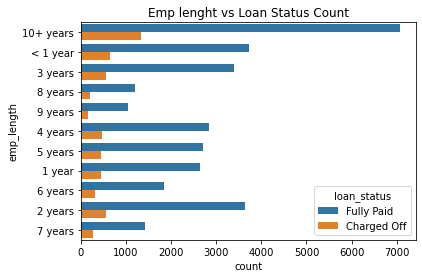

In [61]:
ax = sns.countplot(
    data=data_clean,
    hue="loan_status", 
    y='emp_length'
)
ax.set_title('Emp lenght vs Loan Status Count')

In [62]:
px.line(data_clean[
    data_clean.loan_status == 'Charged Off'
].groupby(by = ['emp_length']).id.count() / data_clean.groupby(by = ['emp_length']).id.count())

**Looking into graph there is only 2% average chages, so we can fill it with unknown category**

In [63]:
data_clean['emp_length'] = data_clean['emp_length'].fillna('Unknown')

In [64]:
data_clean.isna().sum()

id                        0
member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
pub_rec_bankruptcies    118
dtype: int64

<br></br>
**As id, member_id is just unique value for identifying records, so we can drop it**

In [65]:
data_clean.drop(['id', 'member_id'], axis = 1, inplace = True)

In [66]:
data_clean.shape

(37948, 24)

### Creating derived columns and fix dtype

In [67]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37948 entries, 0 to 39688
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37948 non-null  int64  
 1   term                  37948 non-null  object 
 2   int_rate              37948 non-null  object 
 3   installment           37948 non-null  float64
 4   grade                 37948 non-null  object 
 5   sub_grade             37948 non-null  object 
 6   emp_length            37948 non-null  object 
 7   home_ownership        37948 non-null  object 
 8   annual_inc            37948 non-null  float64
 9   verification_status   37948 non-null  object 
 10  issue_d               37948 non-null  object 
 11  loan_status           37948 non-null  object 
 12  purpose               37948 non-null  object 
 13  zip_code              37948 non-null  object 
 14  addr_state            37948 non-null  object 
 15  dti                

In [68]:
data_clean['int_rate'] = data_clean['int_rate'].apply(
    lambda x: float(x.replace('%', ''))
)

In [69]:
data_clean['revol_util'] = data_clean['revol_util'].apply(
    lambda x: float(x.replace('%', ''))
)

In [70]:
data_clean['grade_sublevel_number'] = data_clean['sub_grade'].apply(
    lambda x: x[-1]
)

In [71]:
data_clean['issue_d_month'] = data_clean['issue_d'].apply(lambda x:x.split('-')[0])
data_clean['issue_d_year'] = data_clean['issue_d'].apply(date_handle)

In [72]:
data_clean['loan_income_ratio'] = round(data_clean['loan_amnt'] / data_clean['annual_inc'] * 100, 2)

In [73]:
data_clean['open_to_total_credit_line_ratio'] = data_clean['open_acc']/data_clean['total_acc']*100

In [74]:
data_clean.head()

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   
2       2400   36 months     15.96        84.33     C        C5  10+ years   
3      10000   36 months     13.49       339.31     C        C1  10+ years   
5       5000   36 months      7.90       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

          purpose zip_code addr_state    dti earliest_cr_line  inq_last_6mths  \
0     credit_card    860xx         AZ  27.65           Jan-85               1   
1             car    309xx         GA   1.00           Apr-99               5   
2  small_business    606xx         IL   8.72           Nov-01               2   
3           other    917xx         CA  20.00           Feb-96               1   
5         wedding    852xx         AZ  11.20           Nov-04               3   

   open_acc  pub_rec  revol_bal  revol_util  total_acc  pub_rec_bankruptcies  \
0         3        0      13648        83.7          9                   0.0   
1         3        0       1687         9.4          4                   0.0   
2         2        0       2956        98.5         10                   0.0   
3        10        0       5598        21.0         37                   0.0   
5         9        0       7963        28.3         12                   0.0   

  grade_sublevel_number issue_d_month  issue_d_year  loan_income_ratio  \
0                     2           Dec          2011              20.83   
1                     4           Dec          2011               8.33   
2                     5           Dec          2011              19.59   
3                     1           Dec          2011              20.33   
5                     4           Dec          2011              13.89   

   open_to_total_credit_line_ratio  
0                        33.333333  
1                        75.000000  
2                        20.000000  
3                        27.027027  
5                        75.000000

In [75]:
data_clean['earliest_cr_line_month'] = data_clean['earliest_cr_line'].apply(lambda x:x.split('-')[0])
data_clean['earliest_cr_line_year'] = data_clean['earliest_cr_line'].apply(date_handle)

In [76]:
data_clean.isna().sum()

loan_amnt                            0
term                                 0
int_rate                             0
installment                          0
grade                                0
sub_grade                            0
emp_length                           0
home_ownership                       0
annual_inc                           0
verification_status                  0
issue_d                              0
loan_status                          0
purpose                              0
zip_code                             0
addr_state                           0
dti                                  0
earliest_cr_line                     0
inq_last_6mths                       0
open_acc                             0
pub_rec                              0
revol_bal                            0
revol_util                           0
total_acc                            0
pub_rec_bankruptcies               118
grade_sublevel_number                0
issue_d_month            

<br></br>
#### Outliers
**annual_inc cleaning**

In [77]:
px.scatter(data_clean['annual_inc'].sort_values().unique(), log_y=True)

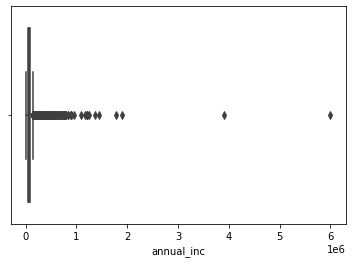

annual_inc -> (Lower Fence = 4000.0, Upper Fence = 144855.7)


In [78]:
uf, lf = upper_lower_fence(data_clean, 'annual_inc')

In [79]:
px.scatter(data_clean[
    data_clean['annual_inc'] < 145000.0 
]['annual_inc'].sort_values().unique())

In [80]:
data_clean[data_clean['annual_inc'] > uf]['annual_inc'].value_counts()

150000.0    217
200000.0    112
160000.0     95
180000.0     82
175000.0     66
           ... 
302000.0      1
211000.0      1
168300.0      1
214992.0      1
213000.0      1
Name: annual_inc, Length: 394, dtype: int64

`annual_inc -> (Lower Fence = 4000.0, Upper Fence = 145000.0)`
**Outliers in annual_inc**
- Count - 1731
- Min - 145008
- Max - 6000000
- Few Value Counts
    ```
    150000.0    217
    200000.0    112
    160000.0     95
    180000.0     82
    175000.0     66
               ... 
    410000.0      1
    302000.0      1
    168300.0      1
    214992.0      1
    213000.0      1
    ```
    

<br></br>

In [81]:
data_clean = data_clean[data_clean['annual_inc'] <= uf]

<br></br>
**Binning the loan amount coulumn**

In [82]:
px.scatter(data_clean['loan_amnt'].sort_values().unique())

In [83]:
data_clean['loan_amnt_range'] = pd.cut(
    data_clean['loan_amnt'],
    [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000],
    labels=[
        '0-5000',
        '5001-10000',
        '10001-15000',
        '15001-20000',
        '20001-25000',
        '25001-30000',
        '30001-35000', 
    ]
)

<br></br>
**Binning int rate**

In [84]:
px.scatter(data_clean['int_rate'].sort_values().unique())

In [85]:
data_clean['int_rate_range'] = pd.cut(
    data_clean['int_rate'],
    [0, 10, 15, 20, 25],
    labels=[
        '0-10',
        '11-15',
        '16-20',
        '21-25',
    ],
)

**So binning annual income will help more rather using coutinious value**

In [86]:
bins = [0, 25000, 50000, 75000, 100000, 20000000]
ranges = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
data_clean['annual_inc_range'] = pd.cut(data_clean['annual_inc'], bins, labels=ranges)

<br></br>
**dti_range binning**

In [87]:
px.scatter(data_clean['dti'].sort_values().unique())

In [88]:
bins = [-0.1, 5.00, 10.00, 15.00, 20.00, 25.00, 30.00]
ranges = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
data_clean['dti_range'] = pd.cut(data_clean['dti'], bins, labels=ranges)

<br></br>
**installment binning**

In [89]:
px.scatter(data_clean['installment'].sort_values().unique())

In [90]:
bins = [0,200,400,600,800,1000,2000]
ranges = ['0-200','200-400','400-600','600-800','800-1000','1000+']
data_clean['installment_ranges'] = pd.cut(data_clean['installment'],bins,labels = ranges)

In [91]:
bins = [1940,1950,1970,1980,1985,1990,1995,2000,2005,2010,2020]
ranges = ['before 1950','1950-1970','1970-1980','1980-1985','1985-1990','1990-1995','1995-2000','2000-2005','2005-2010','2010 onwards']
data_clean['earlist_credit_line_year_ranges'] = pd.cut(data_clean['earliest_cr_line_year'],bins,labels = ranges)

# Analysis - Univariate

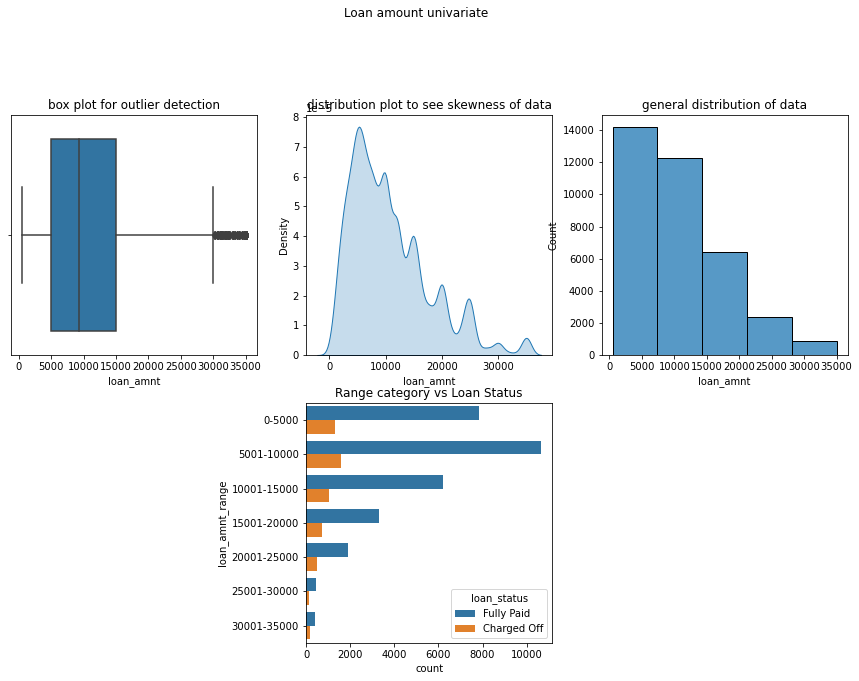

skew:  1.0957406684003141


In [92]:
continuous_variable_graphs(data_clean, 'loan_amnt', title='Loan amount univariate')

In [93]:
univariate(data_clean, 'loan_amnt_range', title='Loan bins amount univariate')

In [94]:
univariate(data_clean, 'verification_status',"Verification_status frequency")

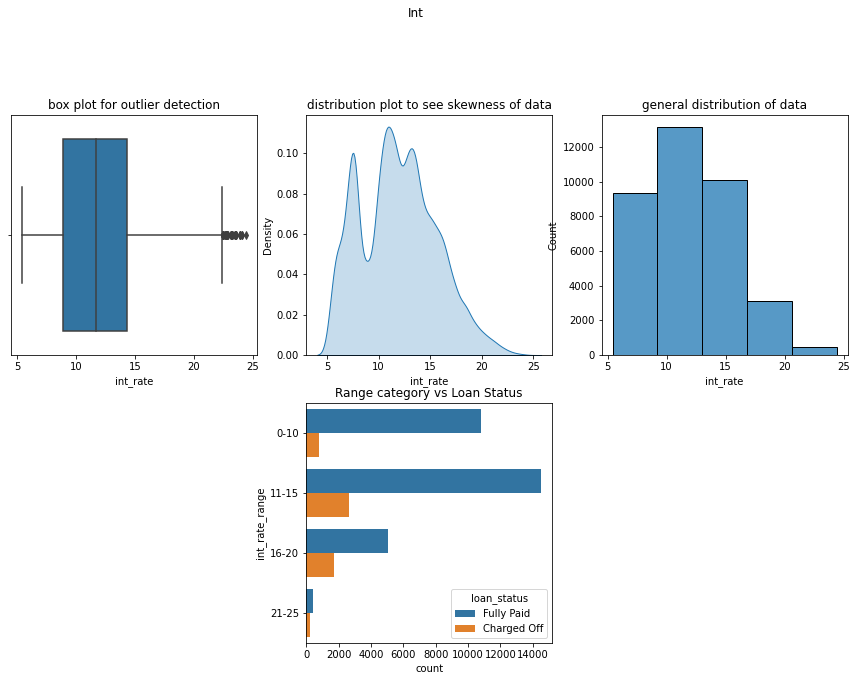

skew:  0.2757844194402896


In [95]:
continuous_variable_graphs(data_clean, 'int_rate', 'Int')

- Almost all data belong to 5 to 15%

In [96]:
univariate(data_clean, 'int_rate_range', title='Intrest rate bins univariate')

In [97]:
univariate(data_clean, 'grade', 'Grade ditribution')

In [98]:
univariate(data_clean,'emp_length', 'emp len distribution')

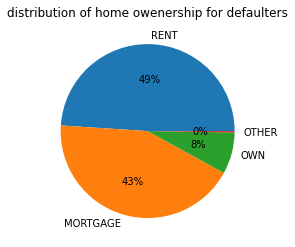

In [99]:
plt.pie(
    data_clean['home_ownership'].value_counts(), 
    labels = data_clean['home_ownership'].value_counts().index, 
    autopct='%.0f%%'
)
plt.title("distribution of home owenership for defaulters")
plt.show()

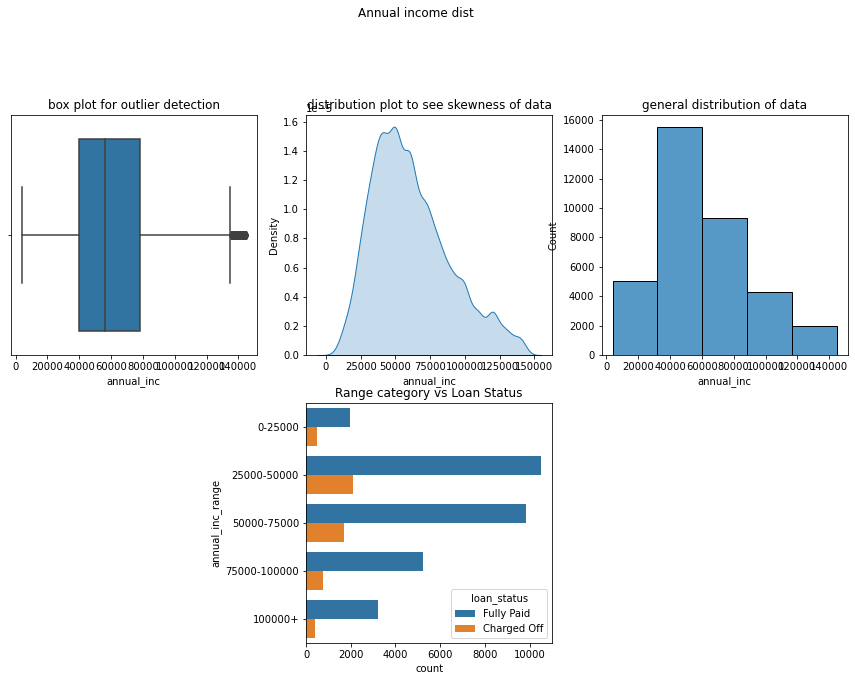

skew:  0.6948538059327524


In [100]:
continuous_variable_graphs(data_clean, 'annual_inc', 'Annual income dist')

In [101]:
univariate(data_clean, 'annual_inc_range', title='Annual income bins amount univariate')

In [102]:
univariate(data_clean, 'verification_status', 'verification_status')

In [103]:
univariate(data_clean,'issue_d_year',"Yearly loan funded accross months")

In [104]:
univariate(data_clean,'issue_d_month',"Yearly loan funded accross months")

In [105]:
univariate(data_clean,'issue_d',"Yearly loan funded accross months")

In [106]:
univariate(data_clean, 'purpose', 'purpose dist')

In [107]:
univariate(data_clean, 'addr_state', 'addr_state dist')

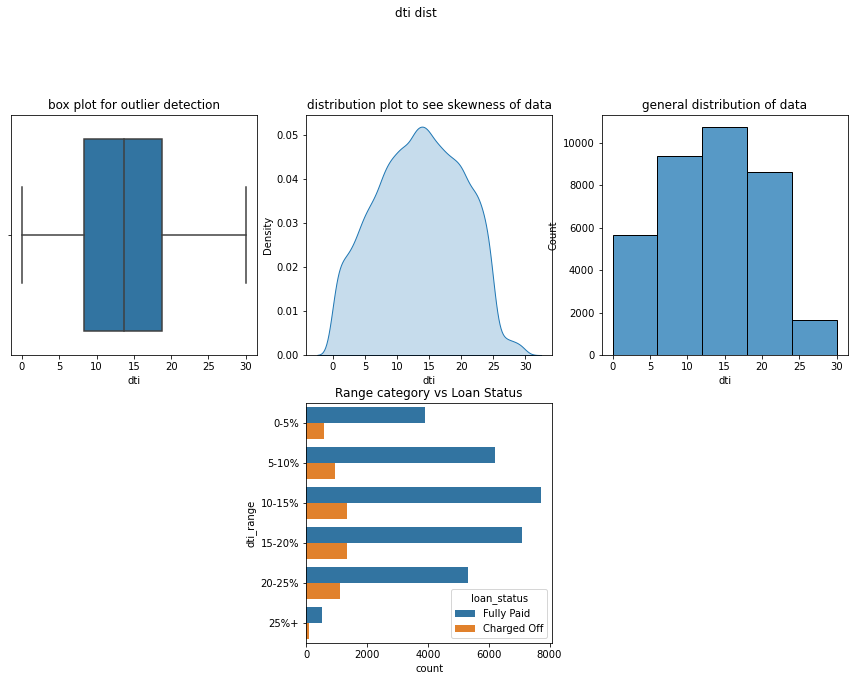

skew:  -0.05412352855754589


In [108]:
continuous_variable_graphs(data_clean, 'dti', 'dti dist')

In [109]:
univariate(data_clean, 'dti_range', 'dti_range bins dist')

In [110]:
log_normal_univariate(data_clean, 'inq_last_6mths', 'inq_last_6mths dist')

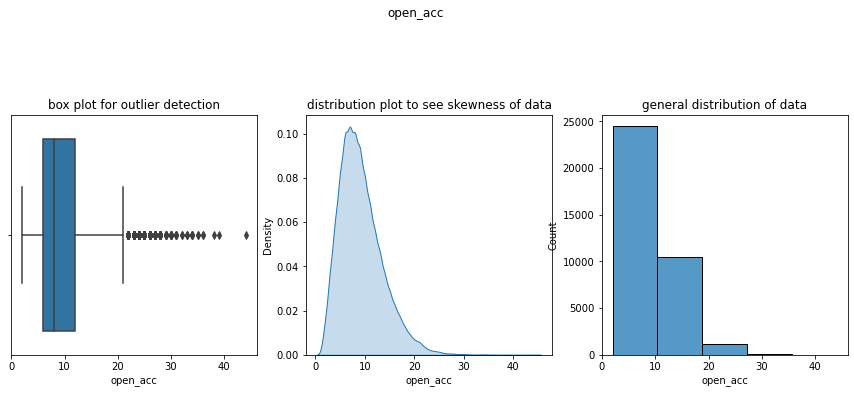

skew:  0.9940990723016913


In [111]:
continuous_variable_graphs(data_clean, 'open_acc', 'open_acc')

In [112]:
log_normal_univariate(data_clean, 'pub_rec', 'pub_rec dist')

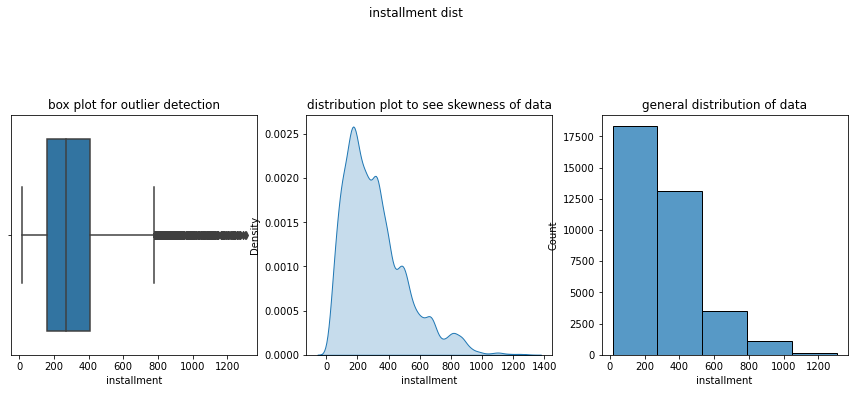

skew:  1.1464686985336372


In [113]:
continuous_variable_graphs(data_clean, 'installment', 'installment dist')

In [114]:
univariate(data_clean, 'installment_ranges', 'installment bins dist')

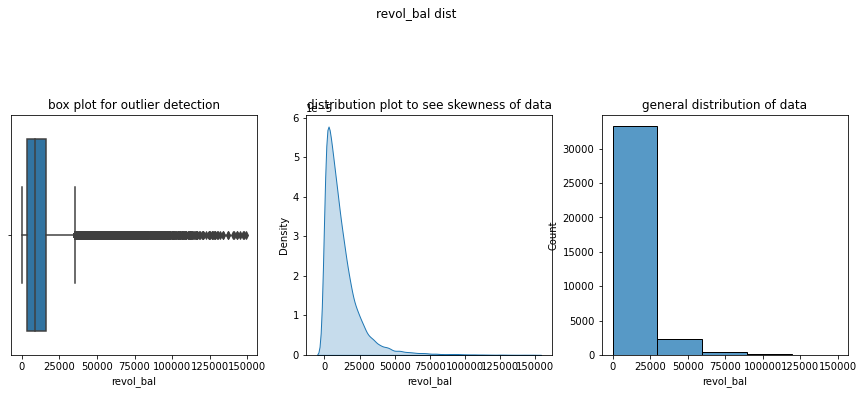

skew:  2.99487220616806


In [115]:
continuous_variable_graphs(data_clean, 'revol_bal', 'revol_bal dist')

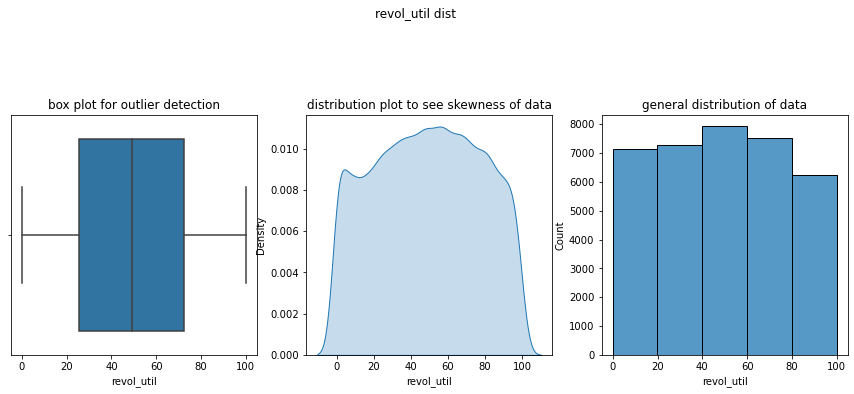

skew:  -0.027405936903844196


In [116]:
continuous_variable_graphs(data_clean, 'revol_util', 'revol_util dist')

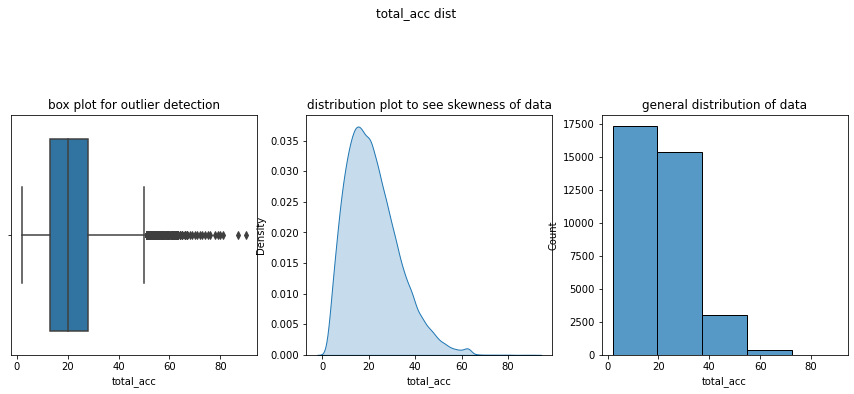

skew:  0.8501274174270679


In [117]:
continuous_variable_graphs(data_clean, 'total_acc', 'total_acc dist')

In [118]:
log_normal_univariate(data_clean, 'pub_rec_bankruptcies', 'pub_rec_bankruptcies dist')

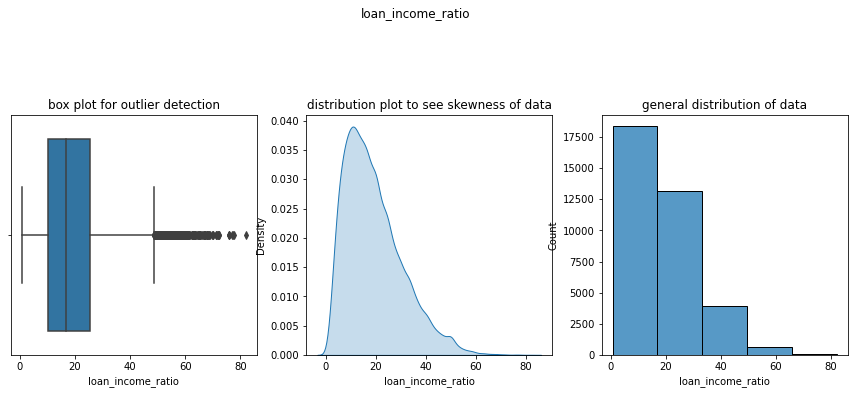

skew:  0.9417221525746089


In [119]:
continuous_variable_graphs(data_clean, 'loan_income_ratio', 'loan_income_ratio')

In [120]:
data_clean.head()

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   
2       2400   36 months     15.96        84.33     C        C5  10+ years   
3      10000   36 months     13.49       339.31     C        C1  10+ years   
5       5000   36 months      7.90       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

          purpose zip_code addr_state    dti earliest_cr_line  inq_last_6mths  \
0     credit_card    860xx         AZ  27.65           Jan-85               1   
1             car    309xx         GA   1.00           Apr-99               5   
2  small_business    606xx         IL   8.72           Nov-01               2   
3           other    917xx         CA  20.00           Feb-96               1   
5         wedding    852xx         AZ  11.20           Nov-04               3   

   open_acc  pub_rec  revol_bal  revol_util  total_acc  pub_rec_bankruptcies  \
0         3        0      13648        83.7          9                   0.0   
1         3        0       1687         9.4          4                   0.0   
2         2        0       2956        98.5         10                   0.0   
3        10        0       5598        21.0         37                   0.0   
5         9        0       7963        28.3         12                   0.0   

  grade_sublevel_number issue_d_month  issue_d_year  loan_income_ratio  \
0                     2           Dec          2011              20.83   
1                     4           Dec          2011               8.33   
2                     5           Dec          2011              19.59   
3                     1           Dec          2011              20.33   
5                     4           Dec          2011              13.89   

   open_to_total_credit_line_ratio earliest_cr_line_month  \
0                        33.333333                    Jan   
1                        75.000000                    Apr   
2                        20.000000                    Nov   
3                        27.027027                    Feb   
5                        75.000000                    Nov   

   earliest_cr_line_year loan_amnt_range int_rate_range annual_inc_range  \
0                   1985          0-5000          11-15          0-25000   
1                   1999          0-5000          16-20      25000-50000   
2                   2001          0-5000          16-20          0-25000   
3                   1996      5001-10000          11-15      25000-50000   
5                   2004          0-5000           0-10      25000-50000   

  dti_range installment_ranges earlist_credit_line_year_ranges  
0      25%+              0-200                       1980-1985  
1      0-5%              0-200                       1995-2000  
2     5-10%              0-200                       2000-2005  
3    15-20%            200-400                       1995-2000  
5    10-15%              0-200                       2000-2005

# BI

## term vs loan_status
### 4.Findings
- most of the loans that were fully paid were opted a term of 36 months,(79% of all fully paid loans)
- Defaulter loans donot not follow this trend,here 43% were 60 month term and 57% were 36 month trend
- Defauter loan borrowers sees an increase in 60 month term as against the Fully Paid loan borrowers

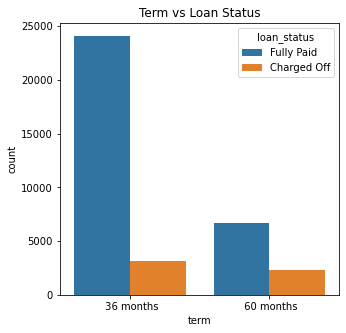

In [121]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(
    data=data_clean,
    x="term", 
    hue='loan_status'
)
ax.set_title('Term vs Loan Status')
plt.show()

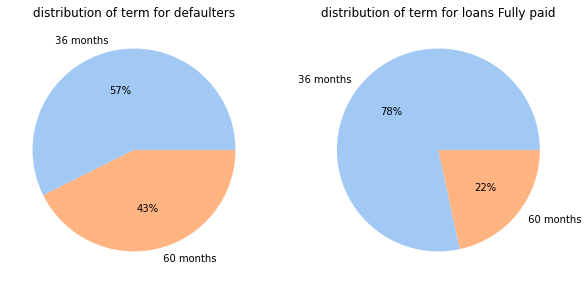

In [122]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart

fig, ax = plt.subplots(ncols = 2,nrows=1,figsize = (10,10))


ax[0].pie(data_clean[data_clean['loan_status']=='Charged Off']['term'].value_counts(), labels = data_clean[data_clean['loan_status']=='Charged Off']['term'].value_counts().index, colors = colors, autopct='%.0f%%')
ax[0].set_title("distribution of term for defaulters")
ax[1].pie(data_clean[data_clean['loan_status']=='Fully Paid']['term'].value_counts(), labels = data_clean[data_clean['loan_status']=='Fully Paid']['term'].value_counts().index, colors = colors, autopct='%.0f%%')
ax[1].set_title("distribution of term for loans Fully paid")

plt.show()


### grade_sublevel_number vs loan_status
- no direct relationship is seen between grade sublevel number and loan status

In [123]:
ot = pd.pivot_table(
    data_clean,
    columns = 'grade_sublevel_number',
    index = 'loan_status',
    values = 'grade',
    aggfunc=lambda x:x.shape[0]
)
ot

grade_sublevel_number     1     2     3     4     5
loan_status                                        
Charged Off             980  1105  1117  1084  1127
Fully Paid             5616  6053  6339  6502  6230

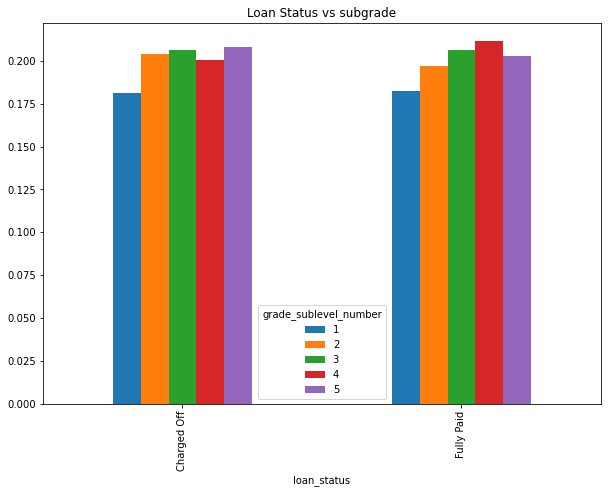

In [124]:
ot[
    list(ot.columns)
].apply(
    lambda x: x / x.sum(),
    axis=1
).plot(
    kind = "bar",
    figsize = (10,7),
    title = 'Loan Status vs subgrade'
)
plt.show()

### sub_grade vs loan status

#### Findings
- Maximum default in F5 followed by G3 and G5

In [125]:
temp = pd.crosstab(data_clean['sub_grade'],data_clean['loan_status'])
temp

loan_status  Charged Off  Fully Paid
sub_grade                           
A1                    30        1058
A2                    74        1356
A3                   103        1615
A4                   173        2560
A5                   213        2369
B1                   166        1521
B2                   217        1653
B3                   326        2303
B4                   320        1984
B5                   350        2113
C1                   328        1599
C2                   313        1504
C3                   267        1124
C4                   209         918
C5                   205         873
D1                   161         703
D2                   264         944
D3                   246         807
D4                   209         646
D5                   200         577
E1                   185         484
E2                   147         409
E3                   110         359
E4                   117         271
E5                    98         238
F1                    80         194
F2                    65         146
F3                    46         109
F4                    45          89
F5                    52          48
G1                    30          57
G2                    25          41
G3                    19          22
G4                    11          34
G5                     9          12

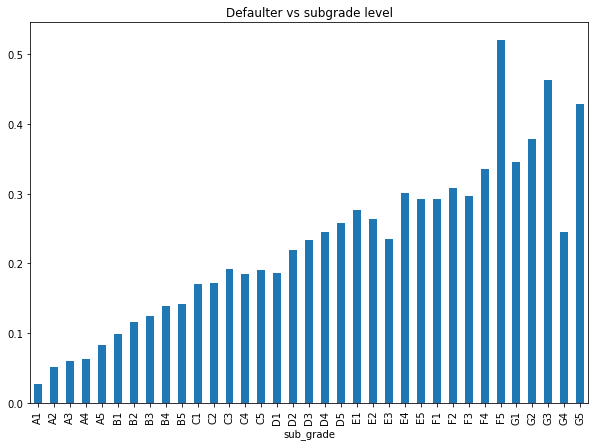

In [126]:
temp[
    list(temp.columns)
].apply(
    lambda x:x/x.sum(),
    axis=1
)[
    'Charged Off'
 ].plot(
    kind = "bar",
    figsize = (10,7),
    stacked = True,
    title= "Defaulter vs subgrade level"
)
plt.show()

## 2 annual_income vs loan_ status
- we have divided annual income into 5 baskets- ['0-25000', '25000-50000', '75000-100000', '50000-75000', '100000+']

### Findings
- Charged off is directly related to annual inc, we see an upward trend ,ie when the annual income increases the percent of loan default decreases
- loans which are fully paid donot show this behaviour


In [127]:
temp = pd.crosstab(
    data_clean['annual_inc_range'],
    data_clean['loan_status']
) 

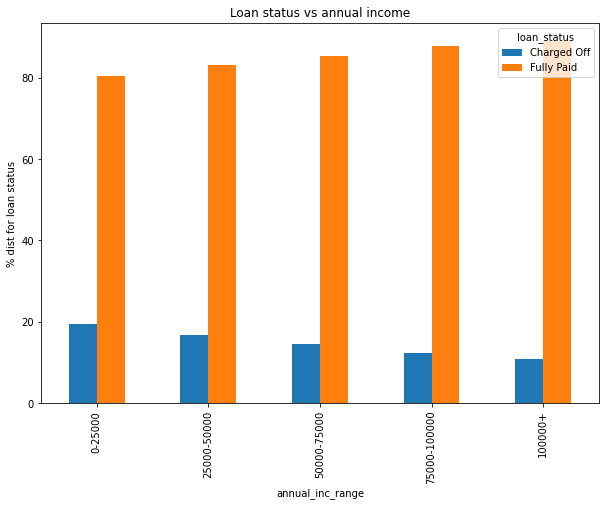

In [128]:
temp[
    list(temp.columns)
].apply(
    lambda x: x / x.sum() * 100,
    axis=1
).plot(
    kind = "bar",
    figsize = (10,7),
    title ='Loan status vs annual income',
)
plt.ylabel('% dist for loan status')
plt.show()

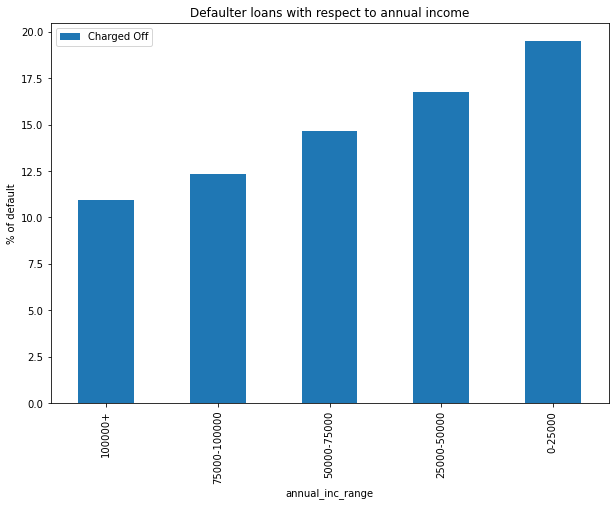

In [129]:
temp[
    ['Charged Off','Fully Paid']
].apply(
    lambda x:x/x.sum()*100,
    axis=1
).sort_values('Charged Off')[
    'Charged Off'
].to_frame().plot(
    kind = "bar",
    figsize = (10,7),
    stacked = True,
    title = 'Defaulter loans with respect to annual income'
)
plt.ylabel('% of default')
plt.show()

### 3 Purpose vs loan status
### Findings
- Debt consolidation has highest number of loan applications
- top 5 categories where loan was defaulted are:
    - small business 26%
    - renewable energy 17%
    - educational 16%
    - medical 15%
    - others 15%


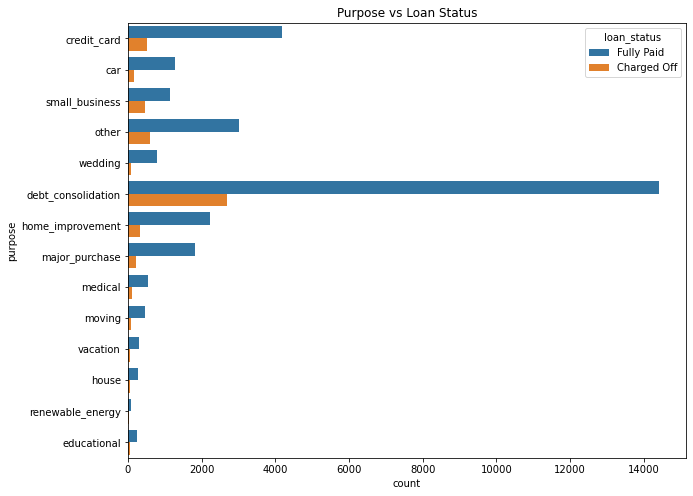

In [130]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=data_clean,y="purpose", hue='loan_status')
ax.set_title('Purpose vs Loan Status')
plt.show()

In [131]:
temp = pd.crosstab(data_clean['purpose'],data_clean['loan_status']) 
temp

loan_status         Charged Off  Fully Paid
purpose                                    
car                         158        1283
credit_card                 520        4183
debt_consolidation         2678       14423
educational                  54         240
home_improvement            319        2218
house                        55         280
major_purchase              216        1817
medical                     103         531
moving                       90         452
other                       603        3003
renewable_energy             18          77
small_business              454        1140
vacation                     52         306
wedding                      93         787

In [132]:
def bi_analysis(df, title = "% distribution"):
    temp[
        list(temp.columns)
    ].apply(
        lambda x:x/x.sum(),
        axis=1
    ).sort_values(
        'Charged Off'
    )['Charged Off'].to_frame().plot(
        kind = "barh",
        figsize = (15,10),
        title = title
    )
    plt.show()   

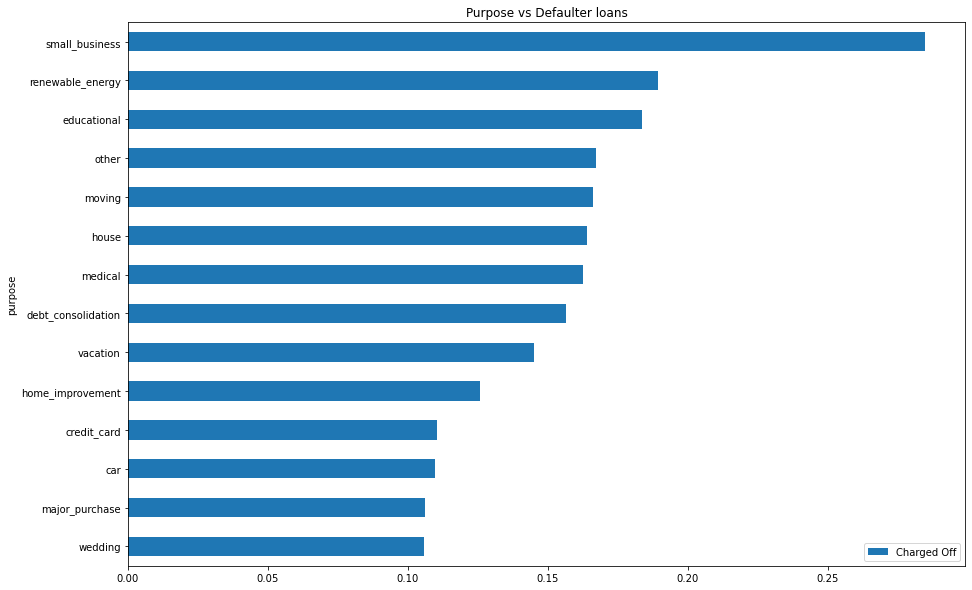

In [133]:
bi_analysis(temp, title="Purpose vs Defaulter loans")

### 4 grade vs loan_status
- Grade seems to have direct relationship with loan status
- A-G as the character increase so does the chances of loan default

In [134]:
temp = pd.crosstab(data_clean['grade'], data_clean['loan_status'])
temp

loan_status  Charged Off  Fully Paid
grade                               
A                    593        8958
B                   1379        9574
C                   1322        6018
D                   1080        3677
E                    657        1761
F                    288         586
G                     94         166

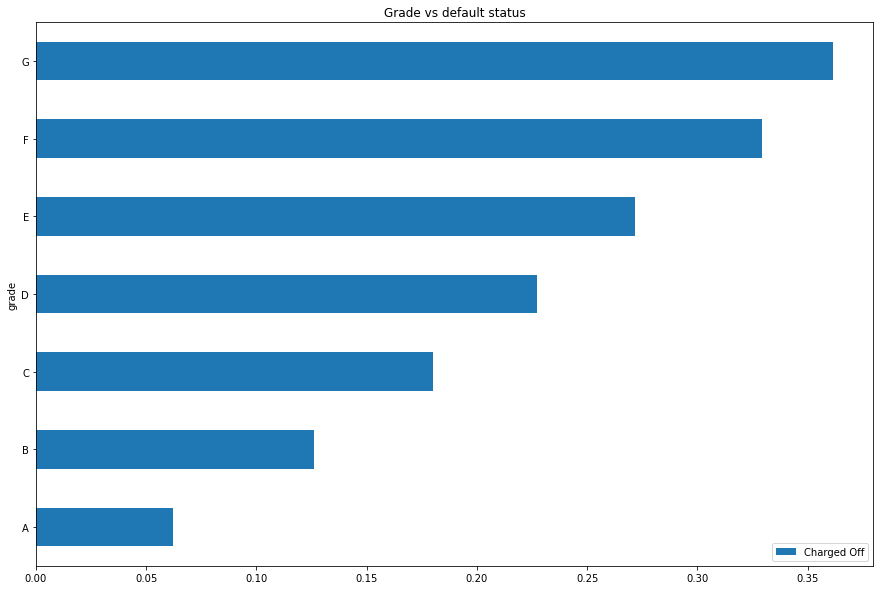

In [135]:
bi_analysis(temp, "Grade vs default status")

#### PLot for Grade vs subgrade for loan defaults( TRIVARIATE??)

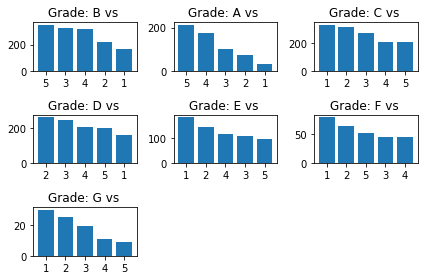

In [136]:

row = 3
col = 3
for i,grade in enumerate(data_clean['grade'].value_counts().index):
    plt.subplot(row, col, i+1)
    column_name=  'grade_sublevel_number'
    temp = data_clean[(data_clean['grade']==grade)&(data_clean['loan_status']=='Charged Off')]
    tempdf = pd.DataFrame({'category':temp[column_name].value_counts().index,'count':temp[column_name].value_counts()})
    p = plt.bar(data = tempdf,x = 'category',height = 'count')
    plt.title(f'Grade: {grade} vs ')
plt.tight_layout()

plt.show()

    

### 4.intrest rate vs loan_statsu
- loan status is highly dependent on intrest rate
- deafulters tend to have intrest on high ratE

In [137]:
temp = pd.crosstab(data_clean['int_rate_range'],data_clean['loan_status'])
temp

loan_status     Charged Off  Fully Paid
int_rate_range                         
0-10                    812       10803
11-15                  2632       14474
16-20                  1700        5057
21-25                   269         406

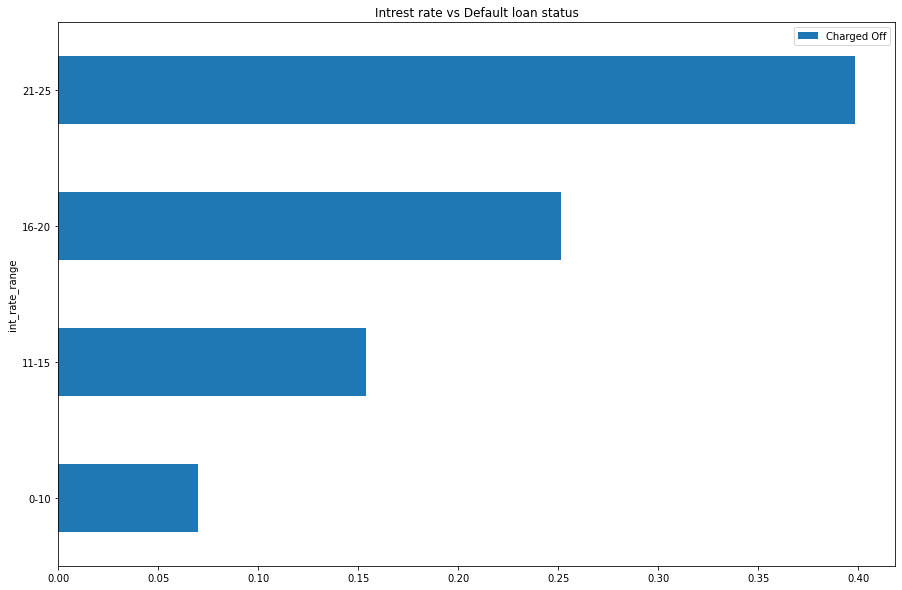

In [138]:
bi_analysis(temp, title="Intrest rate vs Default loan status")

### Dti range vs loan_status
- **Defination** - Ratio of monthly debt payemnt against his total monthly income
- dti values between 0-25 seem to have a direct reationship bwith loan status more the dti more chances of defaulting betwee 0-25 dti
- dti values above 25% donot follow this trend

In [139]:
temp = pd.crosstab(data_clean['dti_range'], data_clean['loan_status'])
temp

loan_status  Charged Off  Fully Paid
dti_range                           
0-5%                 587        3910
5-10%                944        6211
10-15%              1348        7704
15-20%              1346        7082
20-25%              1101        5305
25%+                  87         528

In [140]:
temp = pd.crosstab(data_clean['dti_range'],data_clean['loan_status'])
temp = temp.apply(lambda x:x/x.sum(),axis = 1)
# temp['indexing'] = [1,3,4,5,6,2]
# temp.sort_values('indexing',inplace = True)
# temp.drop(['indexing'],inplace = True,axis = 1)
# temp

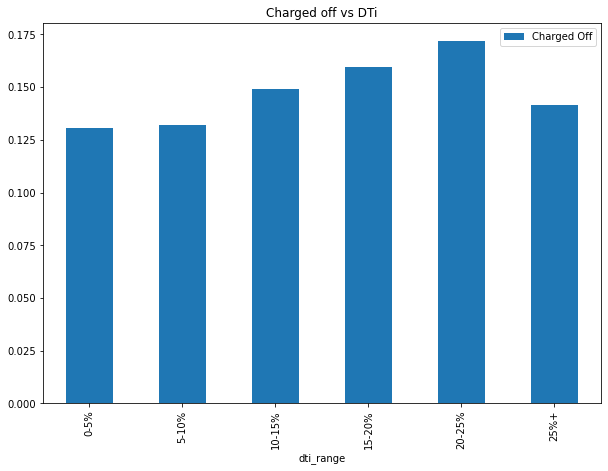

In [141]:
temp[
    list(temp.columns)
]['Charged Off'].to_frame().plot(
    kind = "bar",
    figsize = (10,7),
    title = "Charged off vs DTi"
)
plt.show()

### emp_length vs loan

In [142]:
temp = pd.crosstab(
    data_clean['emp_length'],
    data_clean['loan_status']
)
temp

loan_status  Charged Off  Fully Paid
emp_length                          
1 year               447        2525
10+ years           1275        6559
2 years              547        3494
3 years              537        3237
4 years              441        2727
5 years              440        2579
6 years              294        1756
7 years              252        1374
8 years              193        1131
9 years              150         992
< 1 year             613        3578
Unknown              224         788

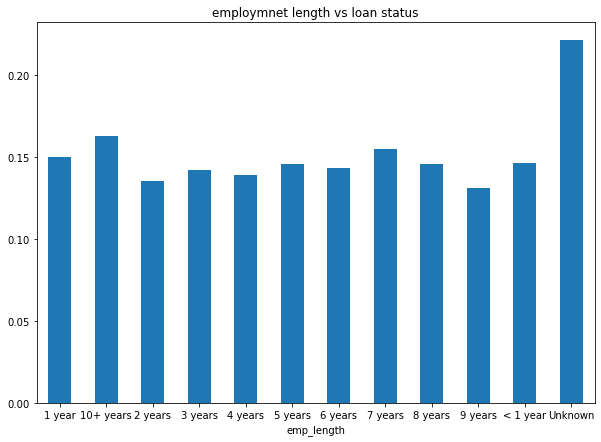

In [143]:
temp[
    list(temp.columns)
].apply(
    lambda x:x/x.sum(),
    axis=1
)['Charged Off'].plot.bar(
    rot = 0,
    figsize = (10,7),
    title = "employmnet length vs loan status"
)
plt.show()

### loan_amnt_range vs loan status

In [144]:
temp = pd.crosstab(data_clean['loan_amnt_range'],data_clean['loan_status'])
temp
temp = temp.apply(lambda x:x/x.sum(),axis = 1)
temp['indexing'] = [1,3,4,5,6,7,2]
temp.sort_values('indexing',inplace = True)
temp.drop(['indexing'],inplace = True,axis = 1)
temp

loan_status      Charged Off  Fully Paid
loan_amnt_range                         
0-5000              0.141371    0.858629
30001-35000         0.285192    0.714808
5001-10000          0.131039    0.868961
10001-15000         0.141813    0.858187
15001-20000         0.180185    0.819815
20001-25000         0.203079    0.796921
25001-30000         0.214777    0.785223

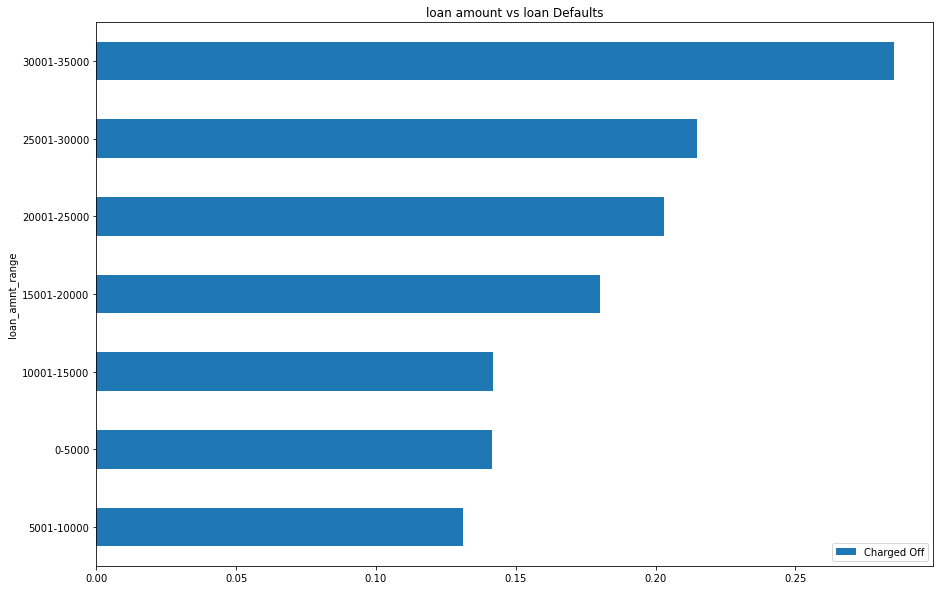

In [145]:
bi_analysis(temp, title="loan amount vs loan Defaults")

## loan amount vs term
- loans greater in amount tend to have a term of 60 months
- increasing trend present ie if lesser amount then 36 month term and if greater then 60 month

In [146]:
temp = pd.crosstab(data_clean['loan_amnt_range'],data_clean['term'])
temp = temp.apply(lambda x:x/x.sum(),axis = 1)
temp

term              36 months   60 months
loan_amnt_range                        
0-5000             0.889947    0.110053
5001-10000         0.837080    0.162920
10001-15000        0.703269    0.296731
15001-20000        0.557524    0.442476
20001-25000        0.504786    0.495214
25001-30000        0.285223    0.714777
30001-35000        0.226691    0.773309

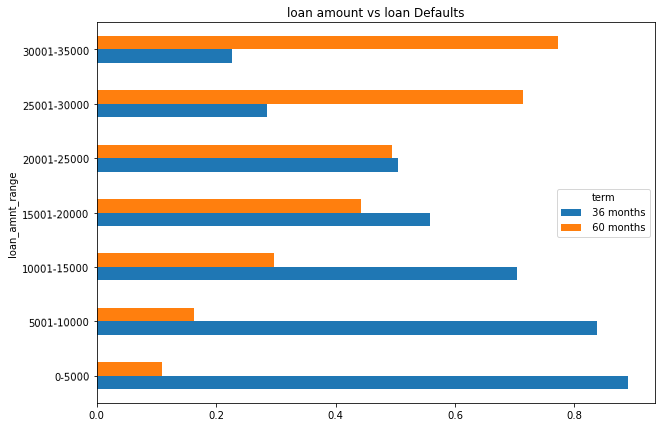

In [147]:
temp.plot(
    kind = "barh", 
    figsize = (10,7), 
    title = "loan amount vs loan Defaults", 
    rot = 1
)
plt.show()

## home_ownership vs loan status
- People belonging to 'OTHER' category in home_ownership tend to default more on loans

In [148]:
col = 'home_ownership'
temp = pd.crosstab(data_clean[col],data_clean['loan_status'])
temp

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2198       13355
OTHER                    17          74
OWN                     434        2370
RENT                   2764       14941

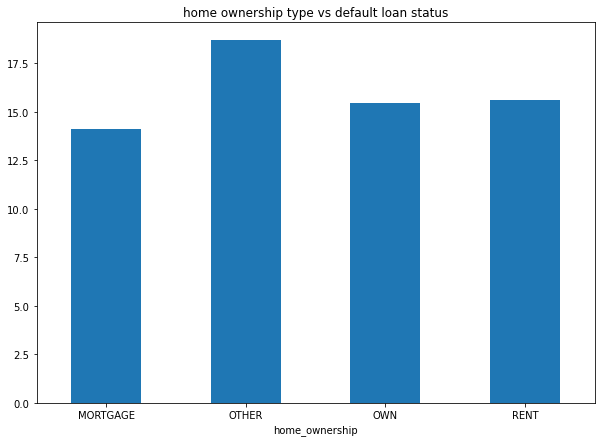

In [149]:
temp[
    list(temp.columns)
].apply(
    lambda x:x/x.sum()*100,
    axis=1
)['Charged Off'].plot.bar(
    rot = 0,
    figsize = (10,7),
    title = "home ownership type vs default loan status"
)
plt.show()

In [150]:
col = 'home_ownership'
temp = pd.crosstab(data_clean[col],data_clean['loan_amnt_range'])
temp

loan_amnt_range  0-5000  5001-10000  10001-15000  15001-20000  20001-25000  \
home_ownership                                                               
MORTGAGE           3122        4952         3360         2010         1371   
OTHER                19          32           22           14            4   
OWN                 846         955          521          258          159   
RENT               5145        6294         3346         1725          869   

loan_amnt_range  25001-30000  30001-35000  
home_ownership                             
MORTGAGE                 367          371  
OTHER                      0            0  
OWN                       32           33  
RENT                     183          143

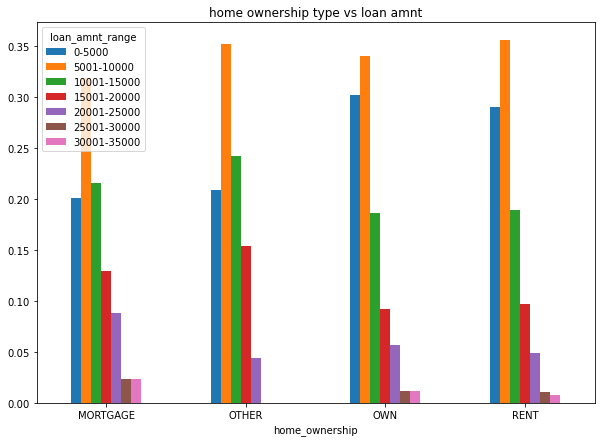

In [151]:
temp[
    list(temp.columns)
].apply(
    lambda x:x/x.sum(),
    axis=1
).plot.bar(
    rot = 0,
    figsize = (10,7),
    title = "home ownership type vs loan amnt"
)
plt.show()

## verification status vs loan status
- Higher charged off status is seen in loans which were `**verified> verified by LC> not verified**`

In [152]:
col = 'verification_status'

In [153]:
temp = pd.crosstab(data_clean[col],data_clean['loan_status'])
temp

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                2091       13639
Source Verified             1372        7796
Verified                    1950        9305

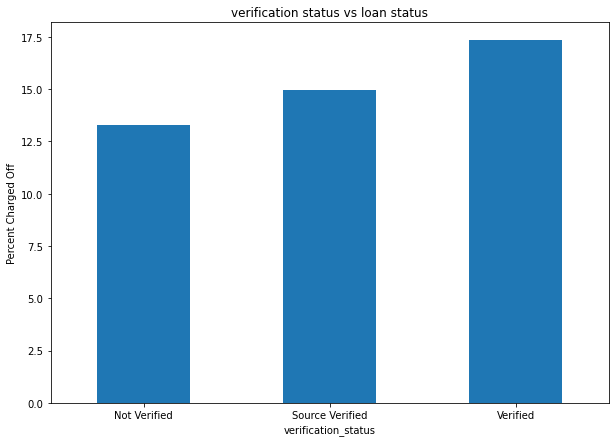

In [154]:
temp[
    list(temp.columns)
].apply(
    lambda x:x/x.sum()*100,
    axis=1
)['Charged Off'].plot.bar(
    rot = 0,
    figsize = (10,7),
    title = "verification status vs loan status"
)
plt.ylabel("Percent Charged Off")
plt.show()


## addr_state vs loan_status
- State of NE(Nebraska) has a very high defaulter rate of 60%
- Top 5 states defaulting are-

    1. NE(Nebraska) - 60%
    2. NV(Nevada) - 22%
    3. SD(South Dakota) - 19%
    4. AK(ALASKA) - 18.3%
    5. FL(Florida) - 18.1%
    

In [155]:
col = 'addr_state'
temp = pd.crosstab(data_clean[col],data_clean['loan_status'])
temp.head()

loan_status  Charged Off  Fully Paid
addr_state                          
AK                    13          57
AL                    51         365
AR                    26         199
AZ                   116         683
CA                  1076        5438

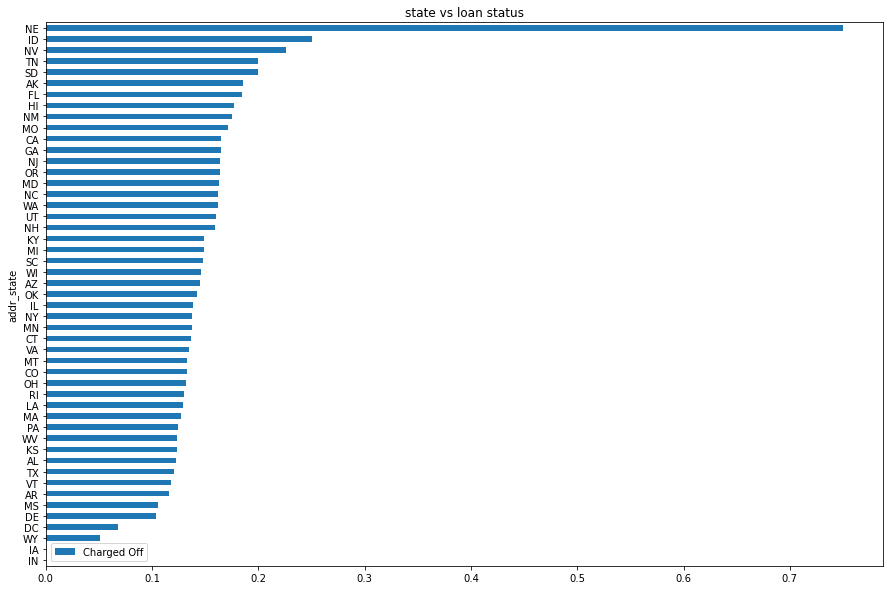

In [156]:
bi_analysis(temp, title="state vs loan status")

In [157]:
data_clean[(data_clean.loan_status == 'Charged Off') & (data_clean.addr_state.isin(['NE', 'ID', 'NV']))].groupby(
    by = ["addr_state", "zip_code"]
).loan_amnt.count().sort_values()

addr_state  zip_code
ID          833xx        1
NE          689xx        1
            685xx        2
NV          894xx        3
            897xx        3
            895xx        5
            890xx       31
            891xx       61
Name: loan_amnt, dtype: int64

## earliest credit line vs loan status

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Count'>

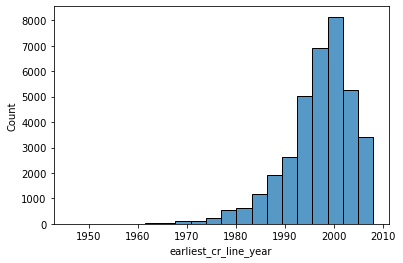

In [158]:
col = 'earliest_cr_line_year'
sns.histplot(data_clean[col],bins = 20)

In [159]:
data_clean['earlist_credit_line_year_ranges'].value_counts()

1995-2000       12678
2000-2005        9081
1990-1995        6775
1985-1990        3240
2005-2010        1984
1980-1985        1356
1970-1980         883
1950-1970         154
before 1950         2
2010 onwards        0
Name: earlist_credit_line_year_ranges, dtype: int64

In [160]:
col = 'earlist_credit_line_year_ranges'
temp = pd.crosstab(data_clean[col],data_clean['loan_status'])
temp.head()

loan_status                      Charged Off  Fully Paid
earlist_credit_line_year_ranges                         
before 1950                                0           2
1950-1970                                 26         128
1970-1980                                118         765
1980-1985                                207        1149
1985-1990                                444        2796

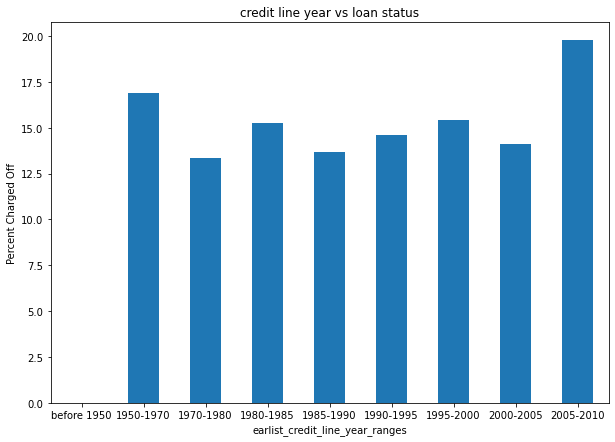

In [161]:
temp[
    list(temp.columns)
].apply(
    lambda x:x/x.sum()*100,
    axis=1
)['Charged Off'].plot.bar(
    rot = 0,
    figsize = (10,7),
    title = "credit line year vs loan status"
)
plt.ylabel("Percent Charged Off")
plt.show()

## pub_rec_bankruptcies vs loan_status
- This colummn is linerlay related to loan status, the more public recorded bankrupties more are the chances of a person defaulting the loan

In [162]:
col = 'pub_rec_bankruptcies'
data_clean[col].value_counts()

0.0    34436
1.0     1600
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [163]:
temp = pd.crosstab(data_clean[col],data_clean['loan_status'])
temp.head()

loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                          4938       29498
1.0                           361        1239
2.0                             2           3

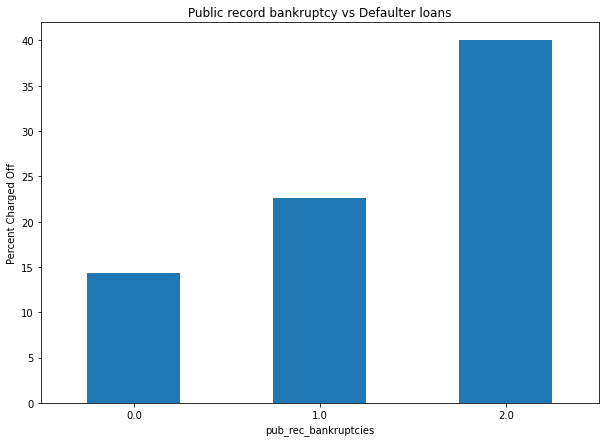

In [164]:
temp[list(temp.columns)].apply(lambda x:x/x.sum()*100,axis=1)['Charged Off'].plot.bar(rot = 0,figsize = (10,7),title = "Public record bankruptcy vs Defaulter loans")
plt.ylabel("Percent Charged Off")
plt.show()

## open_to_total_credit_line_ratio vs loan_status
- **Defination**: 
                    - open_to_total_credit_line_ratio = (open_acc/total_acc)*100
- No significant relationship seen between open_to_total_credit_line_ratio and loan status, this variable does not seem like a ocntributing factor to determine loan defaulter
                    

In [165]:
col ='open_to_total_credit_line_ratio'

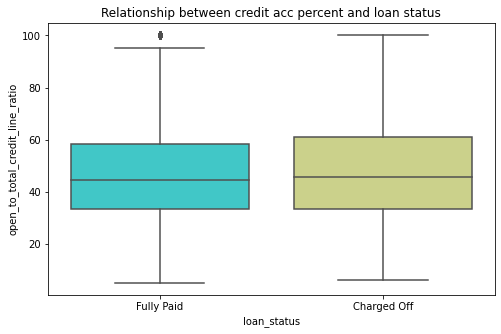

In [166]:
plt.figure(figsize=(8,5))
sns.boxplot(y=col,x='loan_status',data=data_clean, palette='rainbow')
plt.title("Relationship between credit acc percent and loan status")
plt.show()

#### inq_last_6mths vs loan_status
- we see a slight upward trend inenquires against loan_status
- when enquires increase defaulter loans tend to increase

In [167]:
col = 'inq_last_6mths'

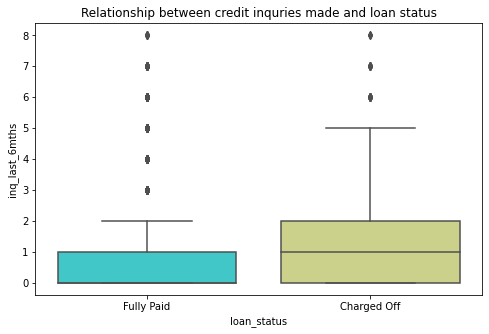

In [168]:
plt.figure(figsize=(8,5))
sns.boxplot(y=col,x='loan_status',data=data_clean, palette='rainbow')
plt.title("Relationship between credit inquries made and loan status")
plt.show()

In [169]:
data_clean[col].value_counts()

0    17619
1     9998
2     5273
3     2746
4      288
5      131
6       56
7       32
8       10
Name: inq_last_6mths, dtype: int64

In [170]:
temp = pd.crosstab(data_clean[col],data_clean['loan_status'])
temp.head()

loan_status     Charged Off  Fully Paid
inq_last_6mths                         
0                      2194       15425
1                      1614        8384
2                       909        4364
3                       591        2155
4                        51         237

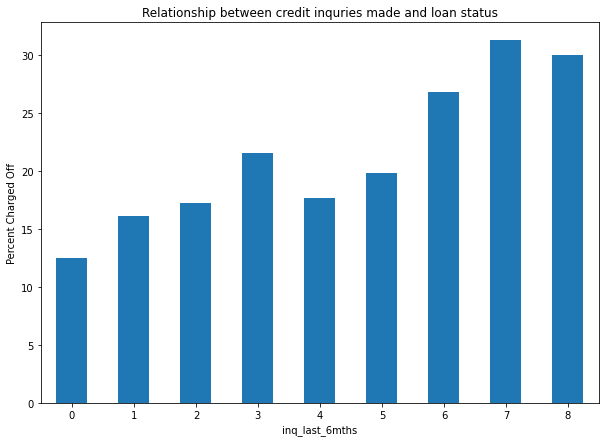

In [171]:
temp[list(temp.columns)].apply(lambda x:x/x.sum()*100,axis=1)['Charged Off'].plot.bar(rot = 0,figsize = (10,7),title = "Relationship between credit inquries made and loan status")
plt.ylabel("Percent Charged Off")
plt.show()

### revolving balance vs loan amnt
- no such relationship seen between revolving balance and loan status

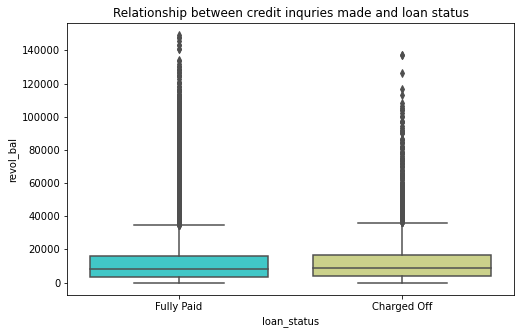

In [172]:
col = 'revol_bal'
plt.figure(figsize=(8,5))
sns.boxplot(y=col,x='loan_status',data=data_clean, palette='rainbow')
plt.title("Relationship between credit inquries made and loan status")
plt.show()

In [185]:
data_parir_plot = data_clean[
    [
        'loan_amnt', 
        'loan_income_ratio', 
        'int_rate', 
        'installment', 
        'annual_inc', 
        'loan_status', 
        'pub_rec_bankruptcies',
    ]
]

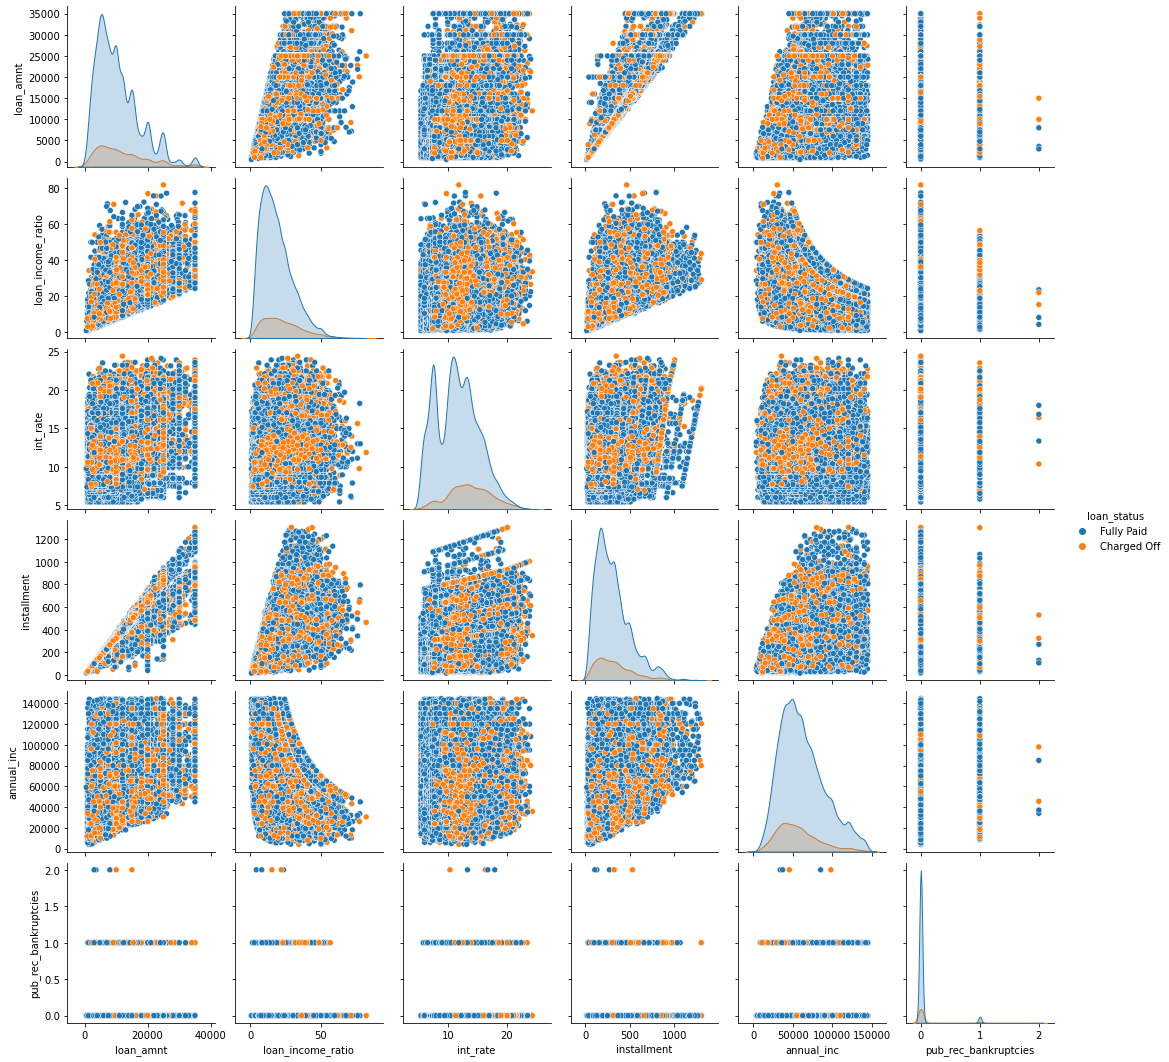

In [186]:
sns.pairplot(data_parir_plot, hue='loan_status')
plt.show()

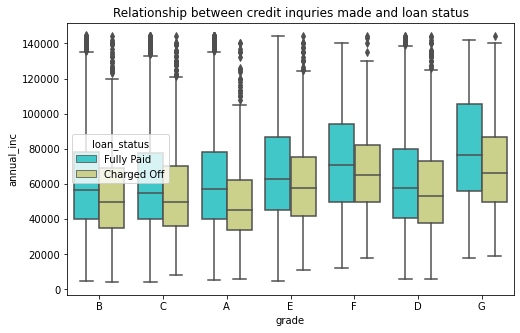

In [175]:
plt.figure(figsize=(8,5))
sns.boxplot(y='annual_inc',x='grade',data=data_clean,hue = 'loan_status', palette='rainbow')
plt.title("Relationship between credit inquries made and loan status")
plt.show()

## Comment
## Multi
## Recom
## PPT
## README